In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv("../data/dflimpio.csv", index_col = 0)

In [26]:
df.head()

carat        cut color clarity  price        size
id                                                   
0    0.30    Premium     D     SI2  6.353   49.437424
1    1.01      Ideal     E    VVS2  9.183  167.551728
2    0.72      Ideal     F     VS2  7.983  116.024916
3    1.08  Very Good     G     SI2  8.371  175.141200
4    0.36    Premium     G     VS1  6.588   57.739500

In [27]:
df = df.dropna(how = "any")

In [28]:
df_numericas = df.select_dtypes(include=np.number)

In [29]:
df_numericas.head(2)

carat  price        size
id                          
0    0.30  6.353   49.437424
1    1.01  9.183  167.551728

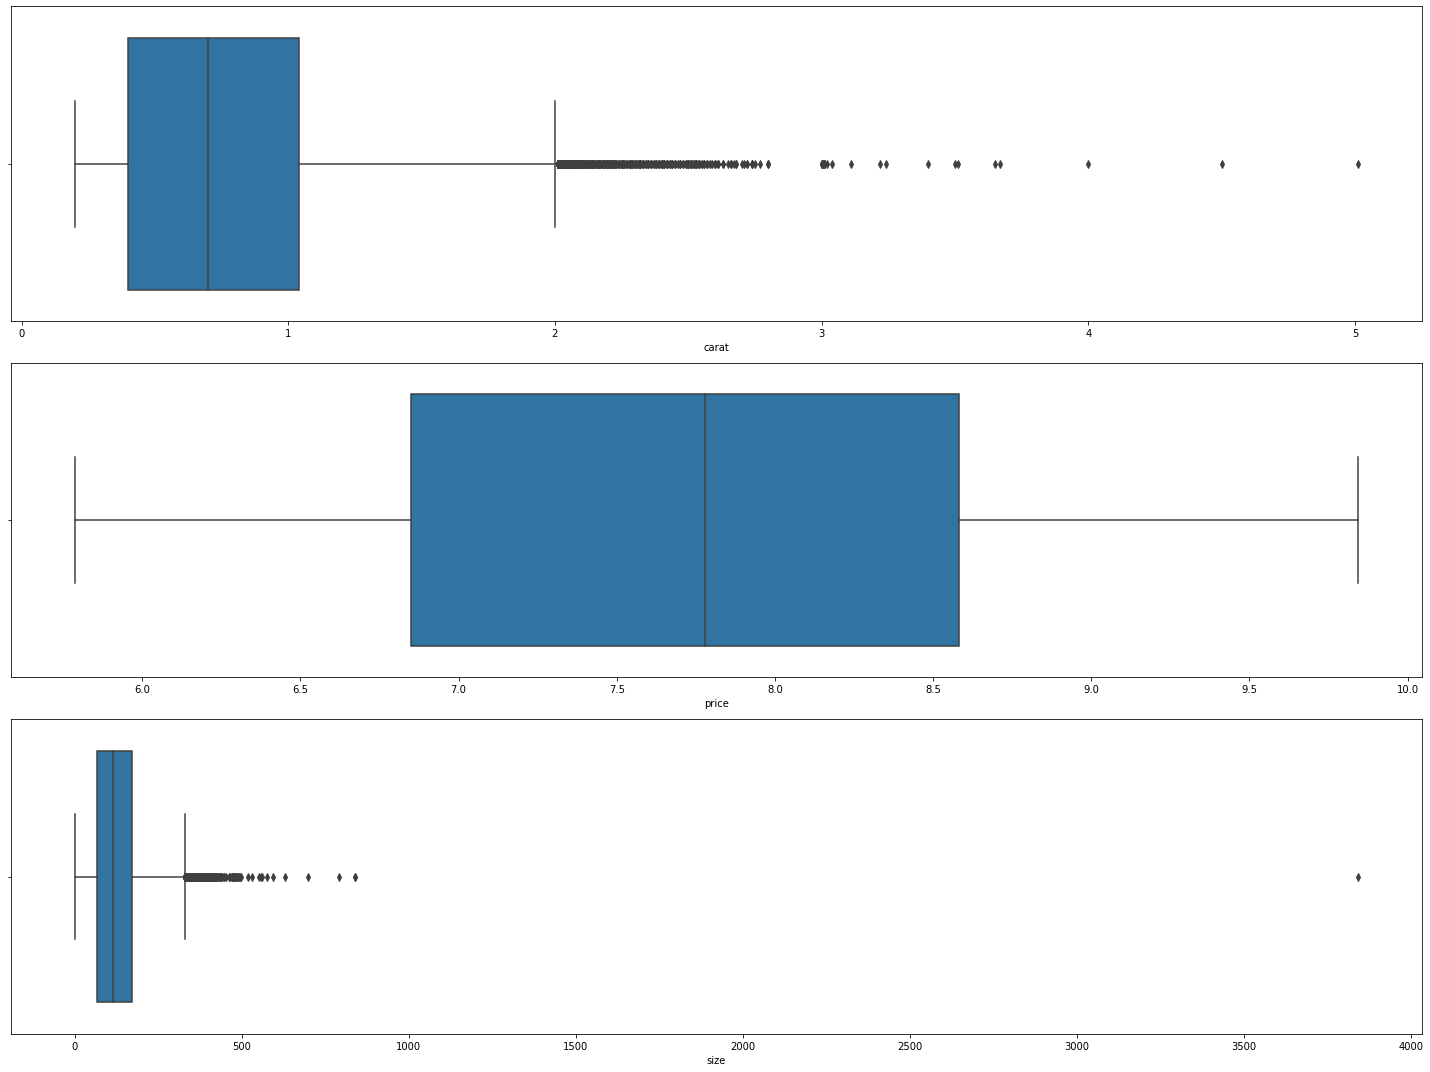

In [30]:
fig, ax = plt.subplots(3, 1, figsize=(20,15))

for i in range(len(df_numericas.columns)):
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i])
    
plt.tight_layout()

plt.show()

In [31]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {}
    
    for col in lista_columnas:
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
              
        if outliers_data.shape[0] > 0:
            dicc_indices[col] = (list(outliers_data.index))       
    
    return dicc_indices 

In [32]:
lista_columnas = df_numericas.columns
lista_columnas

Index(['carat', 'price', 'size'], dtype='object')

In [33]:
outliers = detectar_outliers(lista_columnas, df_numericas)
print(outliers)

{'carat': [40, 85, 130, 173, 244, 264, 274, 289, 292, 295, 312, 346, 398, 574, 587, 662, 681, 682, 716, 725, 728, 782, 785, 798, 799, 801, 818, 928, 973, 993, 995, 1011, 1025, 1026, 1051, 1154, 1216, 1249, 1315, 1388, 1402, 1417, 1418, 1423, 1429, 1433, 1437, 1443, 1522, 1660, 1670, 1739, 1814, 1816, 1866, 1885, 1894, 1967, 1971, 1977, 1995, 2030, 2052, 2063, 2071, 2178, 2194, 2224, 2229, 2238, 2257, 2289, 2340, 2346, 2352, 2357, 2410, 2440, 2449, 2460, 2465, 2468, 2496, 2518, 2529, 2530, 2556, 2570, 2664, 2683, 2767, 2785, 2799, 2811, 2884, 2912, 2935, 2939, 2971, 2981, 3018, 3032, 3073, 3123, 3140, 3146, 3149, 3156, 3237, 3297, 3316, 3348, 3351, 3369, 3378, 3381, 3403, 3430, 3481, 3488, 3491, 3502, 3525, 3545, 3558, 3580, 3593, 3606, 3658, 3666, 3667, 3675, 3699, 3747, 3780, 3790, 3820, 3828, 3837, 3844, 3908, 4084, 4124, 4147, 4192, 4215, 4276, 4285, 4327, 4342, 4356, 4384, 4406, 4411, 4442, 4522, 4594, 4621, 4634, 4649, 4651, 4673, 4674, 4679, 4703, 4721, 4730, 4790, 4824, 4829, 48

In [36]:
df[df['carat'] > 2.8].count()

carat      33
cut        33
color      33
clarity    33
price      33
size       33
dtype: int64

In [37]:
df.drop(df[df['carat'] >= 2.8].index, inplace=True)

In [14]:
#[df['table'] > 70].count()

In [15]:
#df.drop(df[df['table'] >= 70].index, inplace=True)

In [42]:
df[df['size'] >= 420].count()

carat      24
cut        24
color      24
clarity    24
price      24
size       24
dtype: int64

In [43]:
df.drop(df[df['size'] >= 420].index, inplace=True)

In [18]:
#df[df['depth'] >= 70].count()

In [19]:
#df[df['depth'] <= 55].count()

In [20]:
#df.drop(df[df['depth'] >= 70].index, inplace=True)

In [21]:
#df.drop(df[df['depth'] <= 55].index, inplace=True)

In [44]:
df.head()

carat        cut color clarity  price        size
id                                                   
0    0.30    Premium     D     SI2  6.353   49.437424
1    1.01      Ideal     E    VVS2  9.183  167.551728
2    0.72      Ideal     F     VS2  7.983  116.024916
3    1.08  Very Good     G     SI2  8.371  175.141200
4    0.36    Premium     G     VS1  6.588   57.739500

In [45]:
df.to_csv('../data/dfproc.csv')